<a href="https://colab.research.google.com/github/kouzze/factor-analyzer/blob/main/factor-analyzer-pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from dabl.plot import discrete_scatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Urban Air Quality and Health Impact Dataset.csv')
df.columns.values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
       'uvindex', 'severerisk', 'sunrise', 'sunriseEpoch', 'sunset',
       'sunsetEpoch', 'moonphase', 'conditions', 'description', 'icon',
       'stations', 'source', 'City', 'Temp_Range', 'Heat_Index',
       'Severity_Score', 'Condition_Code', 'Month', 'Season',
       'Day_of_Week', 'Is_Weekend', 'Health_Risk_Score'], dtype=object)

In [ ]:
# Limpiamos dataset de las columnas que no entregan valores numéricos
df = df.drop("preciptype", axis=1)
df = df.drop("description", axis=1)
df = df.drop("icon", axis=1)
df = df.drop("stations", axis=1)
df = df.drop("source", axis=1)
df = df.drop("City", axis=1)
df = df.drop("Season", axis=1)
df = df.drop("Day_of_Week", axis=1)
df = df.drop("Is_Weekend", axis=1)

In [ ]:
df.columns.values

array(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'conditions', 'Temp_Range', 'Heat_Index',
       'Severity_Score', 'Condition_Code', 'Month', 'Health_Risk_Score'],
      dtype=object)

In [ ]:
# Columnas a mantener relacionadas con la calidad del aire
cols_to_keep = [
    "tempmax", "tempmin", "temp", "humidity", "precip",
    "precipprob", "precipcover", "windgust", "windspeed", "winddir",
    "pressure", "cloudcover", "visibility", "solarradiation", "solarenergy",
    "uvindex", "dew", "Severity_Score", "Health_Risk_Score"
]

# Seleccionar solo las columnas relevantes
df = df[cols_to_keep]

# Mostrar las primeras filas del DataFrame resultante
print(df.head())


   tempmax  tempmin  temp  humidity  precip  precipprob  precipcover  \
0    106.1     91.0  98.5      21.0   0.000         5.0         0.00   
1    103.9     87.0  95.4      21.5   0.000         3.0         0.00   
2    105.0     83.9  94.7      16.9   0.000         0.0         0.00   
3    106.1     81.2  93.9      15.7   0.012         0.0         4.17   
4    106.1     82.1  94.0      15.9   0.008         0.0         4.17   

   windgust  windspeed  winddir  pressure  cloudcover  visibility  \
0      26.3       13.7    107.3    1009.2        25.0        10.0   
1      20.8       12.8    101.5    1008.8        13.5        10.1   
2      18.3       10.3     90.8    1009.4         6.2        10.1   
3      10.5        5.4    130.1    1006.8         4.9        12.5   
4      15.9        8.1    201.6    1001.8         5.7        15.0   

   solarradiation  solarenergy  uvindex   dew  Severity_Score  \
0           261.4         22.5      9.0  51.5          4.4300   
1           293.3     

In [ ]:
# Definir las columnas independientes (variables que afectan la calidad del aire)
col_ind = [
    "tempmax", "tempmin", "temp", "humidity", "precip",
    "precipprob", "precipcover", "windgust", "windspeed", "winddir",
    "pressure", "cloudcover", "visibility", "solarradiation", "solarenergy",
    "uvindex", "dew", "Severity_Score"
]
df_ind = df[col_ind]  # Crear DataFrame de variables independientes

# Definir la columna dependiente (Health_Risk_Score)
col_dep = ['Health_Risk_Score']
df_dep = df[col_dep]  # Crear DataFrame de la variable dependiente

# Mostrar las primeras filas para verificar
print(df_ind.head())
print(df_dep.head())


   tempmax  tempmin  temp  humidity  precip  precipprob  precipcover  \
0    106.1     91.0  98.5      21.0   0.000         5.0         0.00   
1    103.9     87.0  95.4      21.5   0.000         3.0         0.00   
2    105.0     83.9  94.7      16.9   0.000         0.0         0.00   
3    106.1     81.2  93.9      15.7   0.012         0.0         4.17   
4    106.1     82.1  94.0      15.9   0.008         0.0         4.17   

   windgust  windspeed  winddir  pressure  cloudcover  visibility  \
0      26.3       13.7    107.3    1009.2        25.0        10.0   
1      20.8       12.8    101.5    1008.8        13.5        10.1   
2      18.3       10.3     90.8    1009.4         6.2        10.1   
3      10.5        5.4    130.1    1006.8         4.9        12.5   
4      15.9        8.1    201.6    1001.8         5.7        15.0   

   solarradiation  solarenergy  uvindex   dew  Severity_Score  
0           261.4         22.5      9.0  51.5          4.4300  
1           293.3       

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar las variables independientes
scaler = StandardScaler()
df_ind_scaled = scaler.fit_transform(df_ind.values)

# Entrenar PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(df_ind_scaled)  # Ajustar PCA a los datos escalados

# Transformar los datos
transformada = pca.transform(df_ind_scaled)  # Aplicar PCA a los datos escalados

# Mostrar la forma de los datos transformados
print("Forma original (df_ind_scaled):", df_ind_scaled.shape)
print("Forma después de PCA (transformada):", transformada.shape)

# Primeras filas de los datos transformados
import pandas as pd
print("Primeras filas de la transformación PCA:")
print(pd.DataFrame(transformada, columns=['PC1', 'PC2']).head())


Forma original (df_ind_scaled): (1000, 18)
Forma después de PCA (transformada): (1000, 2)
Primeras filas de la transformación PCA:
        PC1       PC2
0 -2.697785  5.380759
1 -3.164270  4.210780
2 -3.934007  3.526800
3 -2.748588  2.259929
4 -3.027548  2.965913


In [ ]:
# Comparar las estructuras
print(df_pca.values.shape)
print(transformada.shape)

(1000, 3)
(1000, 2)


In [ ]:
# Crear la columna 'Salida' inicializada en None
df['Salida'] = None

# Asignar 1 a 'Salida' para los casos donde 'Health_Risk_Score' es mayor o igual a 9.5
df.loc[df['Health_Risk_Score'] >= 9.5, 'Salida'] = 1

# Asignar 0 a 'Salida' para los casos donde 'Health_Risk_Score' es menor a 9.5
df.loc[df['Health_Risk_Score'] < 9.5, 'Salida'] = 0

# Contar los valores de la columna 'Salida'
salida_counts = df['Salida'].value_counts()
print(salida_counts)


Salida
1    528
0    472
Name: count, dtype: int64


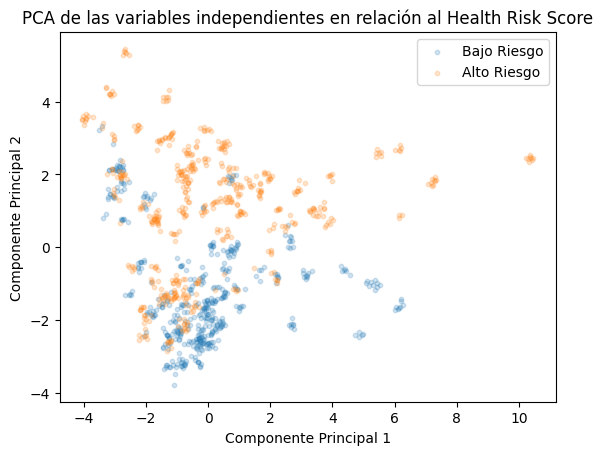

In [ ]:
# Graficar la transformación PCA con los colores basados en la columna 'Salida'
discrete_scatter(x=transformada[:, 0], y=transformada[:, 1], c=df['Salida'].values, unique_c=[0, 1])

# Agregar leyenda, etiquetas y título
plt.legend(['Bajo Riesgo', 'Alto Riesgo'], loc='best')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las variables independientes en relación al Health Risk Score')
plt.show()


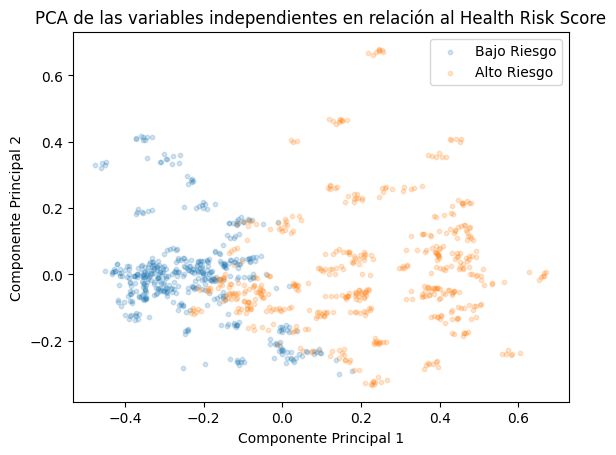

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalar información
escala = MinMaxScaler()
escala.fit(df_pca.values)
escalada = escala.transform(df_pca.values)

# Entrenar PCA con la data escalada
pca.fit(escalada)

# Transformar la información mediante PCA
transformada = pca.transform(escalada)

# Graficar la transformación PCA con los colores basados en la columna 'Salida'
discrete_scatter(x=transformada[:,0], y=transformada[:,1], c=df['Salida'].values, unique_c=[0, 1])

# Agregar leyenda, etiquetas y título
plt.legend(['Bajo Riesgo', 'Alto Riesgo'], loc='best')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las variables independientes en relación al Health Risk Score')
plt.show()


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=f994a57188c698bead4c48fb1df5e83fed5cb8a7e302d44534101d34be26eec8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

In [ ]:
# Crear DataFrame a partir de tu dataset
df_aire = pd.DataFrame(df[['tempmax', 'tempmin', 'temp', 'humidity', 'precip',
                             'precipprob', 'precipcover', 'windgust', 'windspeed',
                             'winddir', 'pressure', 'cloudcover', 'visibility',
                             'solarradiation', 'solarenergy', 'uvindex', 'dew',
                             'Severity_Score', 'Health_Risk_Score']])

# Convertir todas las columnas a numéricas, manejando posibles errores
df_aire = df_aire.apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar la conversión
df_aire.head()


,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,dew,Severity_Score,Health_Risk_Score
0,106.1,91.0,98.5,21.0,0.000,5.0,0.00,26.3,13.7,107.3,1009.2,25.0,10.0,261.4,22.5,9.0,51.5,4.4300,10.522170
1,103.9,87.0,95.4,21.5,0.000,3.0,0.00,20.8,12.8,101.5,1008.8,13.5,10.1,293.3,25.2,9.0,48.7,3.8800,10.062332
2,105.0,83.9,94.7,16.9,0.000,0.0,0.00,18.3,10.3,90.8,1009.4,6.2,10.1,327.0,28.2,9.0,41.7,3.6300,9.673387
3,106.1,81.2,93.9,15.7,0.012,0.0,4.17,10.5,5.4,130.1,1006.8,4.9,12.5,276.8,24.0,9.0,39.1,2.8512,9.411519
4,106.1,82.1,94.0,15.9,0.008,0.0,4.17,15.9,8.1,201.6,1001.8,5.7,15.0,274.9,23.7,9.0,40.1,3.3908,9.515179


In [ ]:
df_aire.describe()

,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,dew,Severity_Score,Health_Risk_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,85.106961,68.641638,76.115967,56.782281,0.032135,12.599437,3.033815,15.229714,9.871120,170.174652,1014.030099,24.160150,13.654867,243.519208,21.027224,7.645897,57.267120,3.057743,9.729103
std,9.524231,8.474102,8.722070,16.708667,0.083461,17.886200,5.438894,5.350923,2.753853,85.741229,5.567010,22.438772,2.111118,50.724565,4.424434,1.566212,9.161517,0.624024,0.679728
min,62.035432,49.108218,55.548415,11.752135,-0.021213,-5.901591,-1.935664,3.495792,4.885928,12.545835,1000.448061,-4.399133,8.249180,8.029656,0.058881,-0.179607,26.261814,1.578048,8.492431
25%,78.661118,62.678245,69.102499,49.982029,-0.000511,1.175418,-0.017344,11.817878,8.261997,104.391049,1010.100000,7.977925,12.100000,225.738421,19.343960,6.968411,51.229378,2.583375,9.195244
50%,84.322847,67.702405,75.222751,58.486182,0.004000,5.463395,0.416872,14.938354,9.587932,161.408617,1012.529215,17.306882,14.889477,257.357420,22.187033,8.000000,58.598490,3.026242,9.546156
75%,91.653987,75.585109,82.396698,66.560400,0.015258,19.540238,4.170000,18.592236,10.852199,247.635671,1018.198525,34.886968,15.043673,269.891939,23.373839,8.938121,62.738294,3.507127,10.242523
max,107.797400,91.635546,99.851684,92.459293,0.471666,103.539121,25.583437,33.516843,19.023118,349.839542,1030.664607,101.581297,15.713548,356.273783,29.821792,10.163190,76.648668,5.158112,11.485725


In [ ]:
# p_value < 0.05 - OK
chi_square_value, p_value = calculate_bartlett_sphericity(df_aire)
chi_square_value, p_value

(24726.881997691726, 0.0)

In [ ]:
kmo_all, kmo_model = calculate_kmo(df_aire)
kmo_model

0.7197740930994083

In [ ]:
fa = FactorAnalyzer()
fa.fit(df_aire)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa.get_communalities()

array([0.96545517, 0.92523758, 1.06526279, 0.55408421, 0.37587537,
       0.69603477, 0.53276736, 0.72548701, 0.6443136 , 0.20440383,
       0.18697834, 0.5479605 , 0.23374324, 0.66297331, 0.66342371,
       0.61421465, 0.38012066, 0.94671571, 0.53130853])

In [ ]:
ev, v = fa.get_eigenvalues()

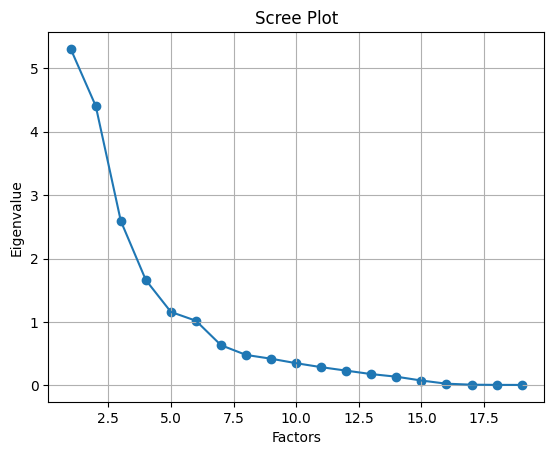

In [ ]:
plt.scatter(range(1,df_aire.shape[1]+1),ev)
plt.plot(range(1,df_aire.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
factores = 5
fa = FactorAnalyzer(factores, rotation="varimax")
fa.fit(df_aire)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [ ]:
arr = []
n = 0
for pesos in fa.loadings_:
  # Use df_aire.columns to access column names instead of feature_names
  name = df_aire.columns[n]
  n += 1
  arr.append([name]+list(pesos))
df_factores = pd.DataFrame(arr, columns = ['Columnas']+['Factor'+str(i) for i in range(1,factores+1)])
df_factores

,Columnas,Factor1,Factor2,Factor3,Factor4,Factor5
0,tempmax,0.929966,0.124389,0.057853,-0.043001,-0.072980
1,tempmin,0.925241,-0.086689,0.078638,0.101632,0.098171
2,temp,1.000809,0.006875,0.085201,0.038125,-0.003646
3,humidity,-0.542790,-0.158611,-0.084629,0.286600,0.741327
4,precip,0.020224,-0.267155,0.003208,0.654354,0.107003
5,precipprob,0.126711,-0.443127,0.091451,0.681139,0.236419
6,precipcover,0.104811,-0.222277,-0.006894,0.888509,0.189272
7,windgust,0.189070,-0.153647,0.931380,-0.018192,0.071342
8,windspeed,-0.024957,-0.037987,0.782676,-0.016860,0.061954
9,winddir,-0.271932,0.283930,-0.057753,-0.159513,-0.160386


from matplotlib import pyplot as plt
df_factores['Factor1'].plot(kind='hist', bins=20, title='Factor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor2'].plot(kind='hist', bins=20, title='Factor2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor3'].plot(kind='hist', bins=20, title='Factor3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor4'].plot(kind='hist', bins=20, title='Factor4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores.plot(kind='scatter', x='Factor1', y='Factor2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores.plot(kind='scatter', x='Factor2', y='Factor3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores.plot(kind='scatter', x='Factor3', y='Factor4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores.plot(kind='scatter', x='Factor4', y='Factor5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor1'].plot(kind='line', figsize=(8, 4), title='Factor1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor2'].plot(kind='line', figsize=(8, 4), title='Factor2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor3'].plot(kind='line', figsize=(8, 4), title='Factor3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_factores['Factor4'].plot(kind='line', figsize=(8, 4), title='Factor4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
ruta = '/content/drive/My Drive/'

In [ ]:
df_factores.to_excel(ruta + 'Calidad_de_Aire.xlsx')

In [ ]:
# Mostrar las cargas factoriales
factor_loadings = fa.loadings_
print("\nCargas factoriales (Factor Loadings):")
print(pd.DataFrame(factor_loadings, index=df_aire.columns))

# Obtener las comunalidades
communalities = fa.get_communalities()
print("\nComunalidades:")
print(communalities)


Cargas factoriales (Factor Loadings):
                          0         1         2         3         4
tempmax            0.929966  0.124389  0.057853 -0.043001 -0.072980
tempmin            0.925241 -0.086689  0.078638  0.101632  0.098171
temp               1.000809  0.006875  0.085201  0.038125 -0.003646
humidity          -0.542790 -0.158611 -0.084629  0.286600  0.741327
precip             0.020224 -0.267155  0.003208  0.654354  0.107003
precipprob         0.126711 -0.443127  0.091451  0.681139  0.236419
precipcover        0.104811 -0.222277 -0.006894  0.888509  0.189272
windgust           0.189070 -0.153647  0.931380 -0.018192  0.071342
windspeed         -0.024957 -0.037987  0.782676 -0.016860  0.061954
winddir           -0.271932  0.283930 -0.057753 -0.159513 -0.160386
pressure          -0.398408 -0.302689 -0.045207 -0.156353 -0.047164
cloudcover         0.027236 -0.551871  0.016176  0.414874  0.221043
visibility         0.065518 -0.161801 -0.472191 -0.136953  0.143427
solarradi

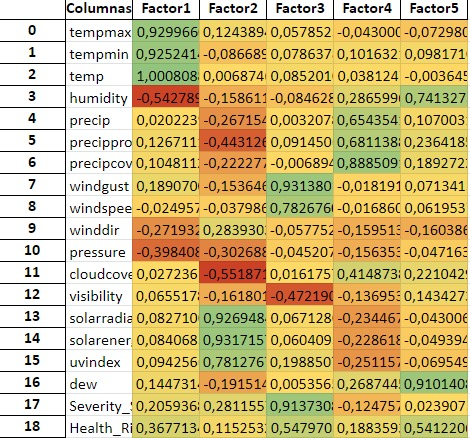